**Exercise 3**

COVID-19 Case Analysis

Dataset retrieved on 17th September, 2022 at 7:19 PM.

Reference: <br>
The New York Times. (2021). Coronavirus (Covid-19) Data in the United States. <br>
Retrieved 17th September 2022, from https://github.com/nytimes/covid-19-data.


In [1]:
#Downloaded on 17-09-2022 at 7:19 PM
import pandas as pd

data = pd.read_csv("us-states.csv")

In [2]:
data.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Make a function that takes a list of state names and plots their new cases vs date

In [3]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import numpy as np

def newcases_plotter(states):
    
    #totals = []*len(states)
    totals = list()
    plt.figure(figsize=(15, 12))
    
    for x in states:
        state_data = data[data['state'] == x]
        
        #Converting cumulative cases to daily cases
        daily_state_data = state_data['cases'].diff().fillna(state_data['cases']) 
        
        state_data.insert(1, "cases_daily", daily_state_data, True)
        
        
        plt.plot(state_data['date'], state_data['cases_daily'], label = x)

    plt.xticks(rotation=30)
    plt.gca().xaxis.set_major_locator(MonthLocator())
    plt.gca().xaxis.set_minor_locator(MonthLocator(bymonthday=15))
    plt.title('New Cases vs Date')
    plt.xlabel('Dates')
    plt.ylabel('New Cases')
    plt.legend(loc="upper left")
    plt.show()
    
    return 

Test the above function. (X axis labelling changed to month-wise labels for better reading)

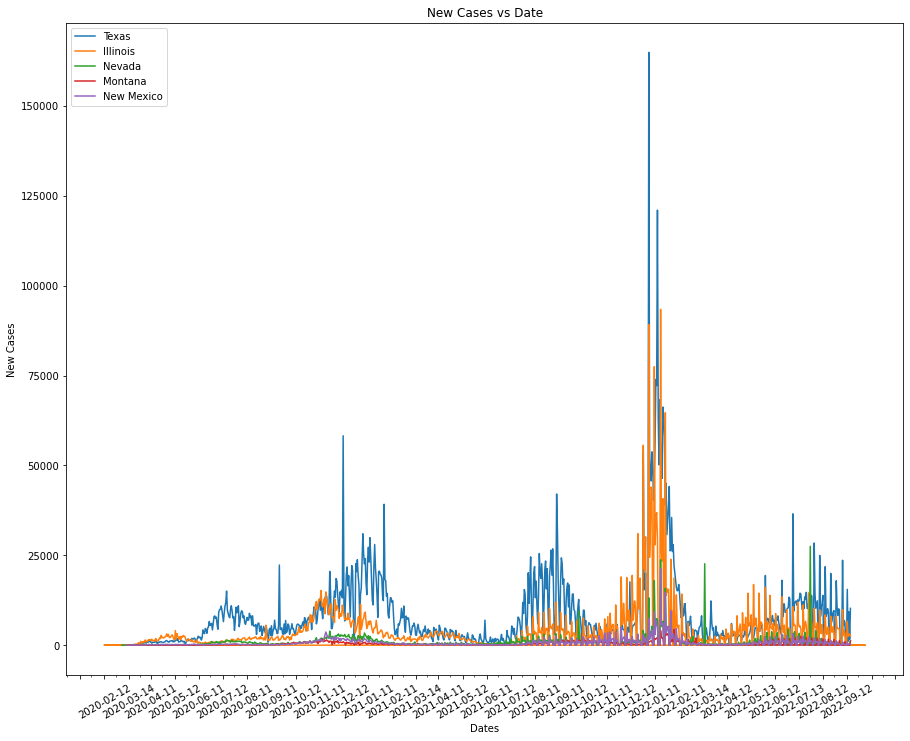

In [4]:
states = ['Texas', 'Illinois', 'Nevada', 'Montana', 'New Mexico']
newcases_plotter(states)

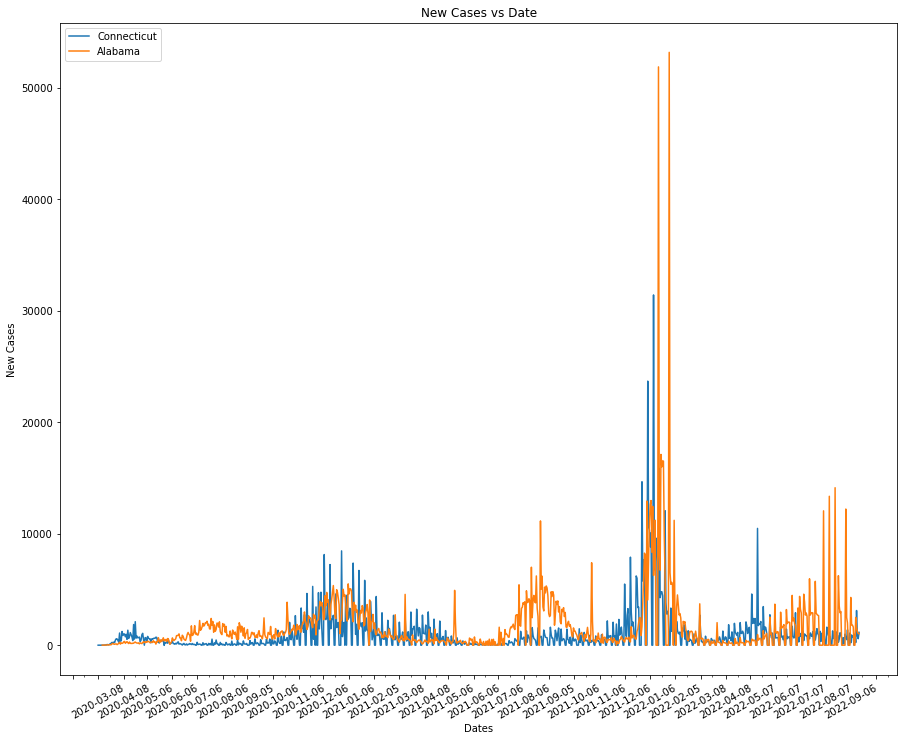

In [5]:
states2 = ['Connecticut', 'Alabama']
newcases_plotter(states2)

Make a function that takes the name of a state and returns the date of its highest number of new cases. 

In [6]:
def max_date_finder(state):
    state_data = data[data['state'] == state]
    
    daily_state_data = state_data['cases'].diff().fillna(state_data['cases'])
    
    max_cases_index = daily_state_data.idxmax()
    
    max_date = state_data['date'].loc[max_cases_index]

    return max_date

In [7]:
max_date_finder('Washington')

'2022-01-18'

In [8]:
max_date_finder('California')

'2022-01-10'

Make a function that takes the names of two states and reports which one had its highest number of daily new cases first and how many days separate their maximums.

In [9]:
from dateutil.parser import parse as parse_date

def highest_daily_compare(states):
    
    dates = list()
    
    for x in states:
        dates.append(max_date_finder(x))
        
    date_difference = (parse_date(dates[0]) - parse_date(dates[1])).days
    
    if date_difference > 0:
        print("%s had its highest number of daily new cases first by %d day(s)." % (states[0],abs(date_difference)))
    elif date_difference < 0:
        print("%s had highest number of daily new cases first by %d day(s)." % (states[1],abs(date_difference)))
    elif date_difference == 0:   
        print("Both states had their highest number of daily new cases on the same day.")
    
    return 

Testing the above function

In [10]:
highest_daily_compare(['Washington', 'California'])

Washington had its highest number of daily new cases first by 8 day(s).


In [11]:
highest_daily_compare(['Kentucky', 'Minnesota'])

Minnesota had highest number of daily new cases first by 1 day(s).
